# EMPLOYEE ATTRITION ANALYSIS 

### CASE STUDY
The project is to help a company which is trying to control attrition. There are two sets of data: "Existing employees" and "Employees who have left". Following attributes are available for every employee;  

-Satisfaction Level  
-Last evaluation  
-Number of projects  
-Average monthly hours  
-Time spent at the company  
-Whether they have had a work accident  
-Whether they have had a promotion in the last 5 years  
-Departments (column sales)  
-Salary  


Use your analytics skills to answer the following questions :
1. What type of employees are leaving?
2. Which employees are prone to leave next.
3. Recommendations

## Notes to Guide

**SIX PHASES OF THE DATA ANALYSIS PROCESS**
1. **ASK;** Ask questions to define both the issue/problem to be solved and the expected/sucessful result/outcome.
2. **PREPARE;** (Data Generation, collection, storage, and data management) Prepare a timeline for the project; identitfy and prepare the tools needed for data collection.
3. **PROCESS;** (Data Cleaning & Data Integrity) Process the data collected, ie clean the data to make sure its complete, correct, relevant, and free of errors and outliers.
4. **ANALYZE;** (Data Exploration, Viz, and analysis) Analyze the cleaned data to find patterns, relationship & trends.
5. **SHARE;** (Communication & Interpretation of Results) Share findings and recommendations with the approriate leaders.
6. **ACT;** See that the institution involved acts on the results/insights provided.

**Project-Based Data Analytics Life Cycle;** has five simple steps:
1. Identifying the Problem. 
2. Designing Data Requirements. 
3. Pre-processing data.
4. Performing data analysis.
5. Visualizing data.


If over 30-40% of data in a column is missing, consider dropping the column. Else, if above 40% of the data in a column is missing, drop the column.

## ASK

**QUESTIONS FOR THIS PROJECT**
1. What is the employee attrition rate in this company?
2. Why did the employees leave?
3. Why are the employees leaving?
4. Who are the employees that have left? i.e. What kind of employees have left the company?
5. How do you identify employees that will leave?
6. How do you prevent more employees from leaving?
7. What are the measures the company needs to adopt to reduce the attrition level to the barest minimum?

## PREPARE

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
existingEmployees = pd.read_excel(
    'TakenMind-Python-Analytics-Problem-case-study-1-1.xlsx',
    sheet_name='Existing employees')

In [3]:
exitedEmployees = pd.read_excel(
    'TakenMind-Python-Analytics-Problem-case-study-1-1.xlsx',
    sheet_name = 'Employees who have left')

#### Getting to Know My data

In [4]:
existingEmployees.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
0,2001.0,0.58,0.74,4.0,215.0,3.0,0.0,0.0,sales,low
1,2002.0,0.82,0.67,2.0,202.0,3.0,0.0,0.0,sales,low
2,2003.0,0.45,0.69,5.0,193.0,3.0,0.0,0.0,sales,low
3,2004.0,0.78,0.82,5.0,247.0,3.0,0.0,0.0,sales,low
4,2005.0,0.49,0.60,3.0,214.0,2.0,0.0,0.0,sales,low


In [5]:
existingEmployees.shape

(11428, 10)

In [6]:
existingEmployees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11428 entries, 0 to 11427
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Emp ID                 11428 non-null  float64
 1   satisfaction_level     11428 non-null  float64
 2   last_evaluation        11428 non-null  float64
 3   number_project         11428 non-null  float64
 4   average_montly_hours   11428 non-null  float64
 5   time_spend_company     11428 non-null  float64
 6   Work_accident          11428 non-null  float64
 7   promotion_last_5years  11428 non-null  float64
 8   dept                   11428 non-null  object 
 9   salary                 11428 non-null  object 
dtypes: float64(8), object(2)
memory usage: 892.9+ KB


In [7]:
existingEmployees.describe()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
count,11428.000000,11428.000000,11428.000000,11428.000000,11428.000000,11428.000000,11428.000000,11428.000000
mean,7812.340742,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
std,3453.947461,0.217104,0.162005,0.979884,45.682731,1.562348,0.379991,0.159889
min,2001.000000,0.120000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000
25%,4857.750000,0.540000,0.580000,3.000000,162.000000,2.000000,0.000000,0.000000
50%,7714.500000,0.690000,0.710000,4.000000,198.000000,3.000000,0.000000,0.000000
75%,10571.250000,0.840000,0.850000,4.000000,238.000000,4.000000,0.000000,0.000000
max,14211.000000,1.000000,1.000000,6.000000,287.000000,10.000000,1.000000,1.000000


In [8]:
exitedEmployees.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
0,1.0,0.38,0.53,2.0,157.0,3.0,0.0,0.0,sales,low
1,2.0,0.80,0.86,5.0,262.0,6.0,0.0,0.0,sales,medium
2,3.0,0.11,0.88,7.0,272.0,4.0,0.0,0.0,sales,medium
3,4.0,0.72,0.87,5.0,223.0,5.0,0.0,0.0,sales,low
4,5.0,0.37,0.52,2.0,159.0,3.0,0.0,0.0,sales,low


In [9]:
exitedEmployees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3571 entries, 0 to 3570
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Emp ID                 3571 non-null   float64
 1   satisfaction_level     3571 non-null   float64
 2   last_evaluation        3571 non-null   float64
 3   number_project         3571 non-null   float64
 4   average_montly_hours   3571 non-null   float64
 5   time_spend_company     3571 non-null   float64
 6   Work_accident          3571 non-null   float64
 7   promotion_last_5years  3571 non-null   float64
 8   dept                   3571 non-null   object 
 9   salary                 3571 non-null   object 
dtypes: float64(8), object(2)
memory usage: 279.1+ KB


In [10]:
exitedEmployees.describe()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
count,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000
mean,6500.439653,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321
std,6266.484705,0.263933,0.197673,1.818165,61.202825,0.977698,0.212364,0.072759
min,1.000000,0.090000,0.450000,2.000000,126.000000,2.000000,0.000000,0.000000
25%,893.500000,0.130000,0.520000,2.000000,146.000000,3.000000,0.000000,0.000000
50%,1786.000000,0.410000,0.790000,4.000000,224.000000,4.000000,0.000000,0.000000
75%,12678.500000,0.730000,0.900000,6.000000,262.000000,5.000000,0.000000,0.000000
max,14999.000000,0.920000,1.000000,7.000000,310.000000,6.000000,1.000000,1.000000


## DATA PROCESSING

In [11]:
# Creating a new column named 'Employee_Label'

existingEmployees['Employee_Label'] = 'Current'
exitedEmployees['Employee_Label'] = 'Former'

In [12]:
# Joining the two different datasets to form a new dataset named 'fullEmployeeData'

fullEmployeeData = pd.concat([existingEmployees,exitedEmployees], axis=0)
fullEmployeeData.reset_index(drop=True, inplace=True)

In [13]:
mDF = fullEmployeeData.copy()

In [14]:
fullEmployeeData.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,Employee_Label
0,2001.0,0.58,0.74,4.0,215.0,3.0,0.0,0.0,sales,low,Current
1,2002.0,0.82,0.67,2.0,202.0,3.0,0.0,0.0,sales,low,Current
2,2003.0,0.45,0.69,5.0,193.0,3.0,0.0,0.0,sales,low,Current
3,2004.0,0.78,0.82,5.0,247.0,3.0,0.0,0.0,sales,low,Current
4,2005.0,0.49,0.60,3.0,214.0,2.0,0.0,0.0,sales,low,Current


In [15]:
fullEmployeeData.tail()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,Employee_Label
14994,14995.0,0.40,0.57,2.0,151.0,3.0,0.0,0.0,support,low,Former
14995,14996.0,0.37,0.48,2.0,160.0,3.0,0.0,0.0,support,low,Former
14996,14997.0,0.37,0.53,2.0,143.0,3.0,0.0,0.0,support,low,Former
14997,14998.0,0.11,0.96,6.0,280.0,4.0,0.0,0.0,support,low,Former
14998,14999.0,0.37,0.52,2.0,158.0,3.0,0.0,0.0,support,low,Former


In [16]:
fullEmployeeData.shape

(14999, 11)

In [17]:
fullEmployeeData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Emp ID                 14999 non-null  float64
 1   satisfaction_level     14999 non-null  float64
 2   last_evaluation        14999 non-null  float64
 3   number_project         14999 non-null  float64
 4   average_montly_hours   14999 non-null  float64
 5   time_spend_company     14999 non-null  float64
 6   Work_accident          14999 non-null  float64
 7   promotion_last_5years  14999 non-null  float64
 8   dept                   14999 non-null  object 
 9   salary                 14999 non-null  object 
 10  Employee_Label         14999 non-null  object 
dtypes: float64(8), object(3)
memory usage: 1.3+ MB


In [18]:
fullEmployeeData = fullEmployeeData.astype({'Emp ID':'object'})

In [19]:
fullEmployeeData.isnull().sum()

Emp ID                   0
satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
dept                     0
salary                   0
Employee_Label           0
dtype: int64

In [20]:
fullEmployeeData.columns

Index(['Emp ID', 'satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'dept', 'salary', 'Employee_Label'],
      dtype='object')

In [21]:
# The 'Work_accident' column
fullEmployeeData['Work_accident'].unique()

array([0., 1.])

In [22]:
# The 'Promotion_last_5years' column
fullEmployeeData['promotion_last_5years'].unique()

array([0., 1.])

In [23]:
# Expressing the boolean values of the 'Work_accident' and the 'promotion_last_5years' columns
fullEmployeeData['Work_accident'] = fullEmployeeData['Work_accident'].apply(lambda x: "Yes" if x==1 else "No")
fullEmployeeData['promotion_last_5years'] = fullEmployeeData['promotion_last_5years'].apply(lambda x: "Yes" if x==1 else "No")

In [24]:
fullEmployeeData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Emp ID                 14999 non-null  object 
 1   satisfaction_level     14999 non-null  float64
 2   last_evaluation        14999 non-null  float64
 3   number_project         14999 non-null  float64
 4   average_montly_hours   14999 non-null  float64
 5   time_spend_company     14999 non-null  float64
 6   Work_accident          14999 non-null  object 
 7   promotion_last_5years  14999 non-null  object 
 8   dept                   14999 non-null  object 
 9   salary                 14999 non-null  object 
 10  Employee_Label         14999 non-null  object 
dtypes: float64(5), object(6)
memory usage: 1.3+ MB


In [25]:
fullEmployeeData

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,Employee_Label
0,2001.0,0.58,0.74,4.0,215.0,3.0,No,No,sales,low,Current
1,2002.0,0.82,0.67,2.0,202.0,3.0,No,No,sales,low,Current
2,2003.0,0.45,0.69,5.0,193.0,3.0,No,No,sales,low,Current
3,2004.0,0.78,0.82,5.0,247.0,3.0,No,No,sales,low,Current
4,2005.0,0.49,0.60,3.0,214.0,2.0,No,No,sales,low,Current
...,...,...,...,...,...,...,...,...,...,...,...
14994,14995.0,0.40,0.57,2.0,151.0,3.0,No,No,support,low,Former
14995,14996.0,0.37,0.48,2.0,160.0,3.0,No,No,support,low,Former
14996,14997.0,0.37,0.53,2.0,143.0,3.0,No,No,support,low,Former
14997,14998.0,0.11,0.96,6.0,280.0,4.0,No,No,support,low,Former


In [26]:
fullEmployeeData.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233
std,0.248631,0.171169,1.232592,49.943099,1.460136
min,0.090000,0.360000,2.000000,96.000000,2.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000


In [27]:
# Seperating Categorical columns & Numerical columns
cat_col = [col for col in fullEmployeeData.columns if fullEmployeeData[col].dtype == 'object']
num_col = [col for col in fullEmployeeData.columns if fullEmployeeData[col].dtype != 'object']

In [28]:
fullEmployeeData[cat_col]

,Emp ID,Work_accident,promotion_last_5years,dept,salary,Employee_Label
0,2001.0,No,No,sales,low,Current
1,2002.0,No,No,sales,low,Current
2,2003.0,No,No,sales,low,Current
3,2004.0,No,No,sales,low,Current
4,2005.0,No,No,sales,low,Current
...,...,...,...,...,...,...
14994,14995.0,No,No,support,low,Former
14995,14996.0,No,No,support,low,Former
14996,14997.0,No,No,support,low,Former
14997,14998.0,No,No,support,low,Former


In [29]:
fullEmployeeData[num_col]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
0,0.58,0.74,4.0,215.0,3.0
1,0.82,0.67,2.0,202.0,3.0
2,0.45,0.69,5.0,193.0,3.0
3,0.78,0.82,5.0,247.0,3.0
4,0.49,0.60,3.0,214.0,2.0
...,...,...,...,...,...
14994,0.40,0.57,2.0,151.0,3.0
14995,0.37,0.48,2.0,160.0,3.0
14996,0.37,0.53,2.0,143.0,3.0
14997,0.11,0.96,6.0,280.0,4.0


In [30]:
# The 'Average_montly_hours' column
fullEmployeeData['average_montly_hours'].unique()

array([215., 202., 193., 247., 214., 206., 176., 136., 127., 268., 258.,
       255., 218., 224., 231., 191., 165., 252., 266., 248., 144., 174.,
       179., 246., 201., 208., 267., 262., 235., 160., 175., 177., 138.,
       241., 240., 260., 196., 140., 242., 279., 228., 171., 153., 182.,
       239., 237., 251., 178., 148., 269., 147., 198., 143., 238., 213.,
       226., 169., 205., 111., 104., 212., 236., 245., 106., 220., 100.,
       244., 139., 152., 194., 209., 151., 282., 256., 185., 132., 233.,
       222., 155., 161., 200., 227., 270., 230., 207., 234., 187., 257.,
       162., 210., 189., 186., 128., 142., 199., 157., 172., 183., 167.,
       223., 163., 168., 141., 159., 149., 129., 225., 229., 195., 108.,
       180., 145., 122., 110., 115., 150., 272., 197., 164., 216., 102.,
       284., 232., 133., 109., 154., 137., 192., 204., 190., 259.,  99.,
       146., 253., 101.,  97., 134., 271., 173., 263., 121., 166., 158.,
       184., 135., 250., 217., 273., 156., 130., 18

In [31]:
fullEmployeeData['average_montly_hours'].nunique()

215

Creating a new column (called the 'Ave_monthly_hours_band') from the 'Average_montly_hours' column, where its values are grouped by a band of 50 hours.

In [32]:
# Making a function called 'f'

def f(row):
    if row['average_montly_hours'] < 50:
        val = '0 - 49'
    elif row['average_montly_hours'] < 100:
        val = '50 - 99'
    elif row['average_montly_hours'] < 150:
        val = '100 - 149'
    elif row['average_montly_hours'] < 200:
        val = '150 - 199'
    elif row['average_montly_hours'] < 250:
        val = '200 - 249'
    elif row['average_montly_hours'] < 300:
        val = '250 - 299'
    else:
        val = '300 - 349'
    return val

In [33]:
# 96.0 to 310
# qty 215
fullEmployeeData['ave_monthly_hours_bands'] = fullEmployeeData.apply(f, axis=1)

In [34]:
fullEmployeeData

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,Employee_Label,ave_monthly_hours_bands
0,2001.0,0.58,0.74,4.0,215.0,3.0,No,No,sales,low,Current,200 - 249
1,2002.0,0.82,0.67,2.0,202.0,3.0,No,No,sales,low,Current,200 - 249
2,2003.0,0.45,0.69,5.0,193.0,3.0,No,No,sales,low,Current,150 - 199
3,2004.0,0.78,0.82,5.0,247.0,3.0,No,No,sales,low,Current,200 - 249
4,2005.0,0.49,0.60,3.0,214.0,2.0,No,No,sales,low,Current,200 - 249
...,...,...,...,...,...,...,...,...,...,...,...,...
14994,14995.0,0.40,0.57,2.0,151.0,3.0,No,No,support,low,Former,150 - 199
14995,14996.0,0.37,0.48,2.0,160.0,3.0,No,No,support,low,Former,150 - 199
14996,14997.0,0.37,0.53,2.0,143.0,3.0,No,No,support,low,Former,100 - 149
14997,14998.0,0.11,0.96,6.0,280.0,4.0,No,No,support,low,Former,250 - 299


## ANALYZE

#### EDA


Proper Exploratory Data Analysis
- comparing employees that have left and those that are still employed in the company
- check for patterns/trends between the two groups

In [35]:
# Employee Population per category

fullEmployeeData.groupby(['Employee_Label'])['Emp ID'].count()

Employee_Label
Current    11428
Former      3571
Name: Emp ID, dtype: int64

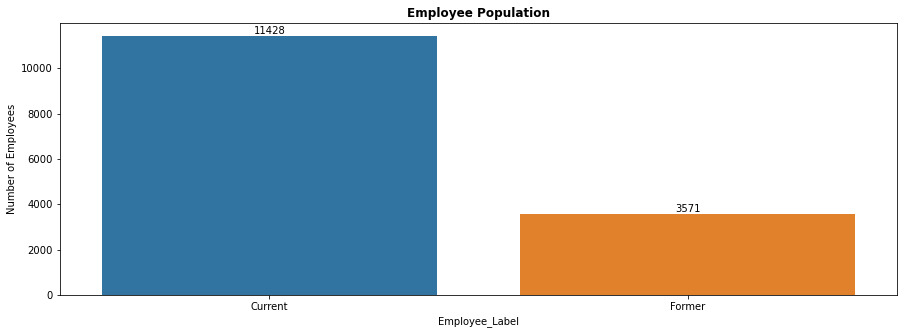

In [36]:
fig1 =  plt.figure(figsize=(15,5))
ax = sns.countplot(
        x='Employee_Label',
        data= fullEmployeeData,
)
plt.title('Employee Population',fontweight='bold')
plt.ylabel('Number of Employees')
for i in ax.containers:
    ax.bar_label(i,)

Here, we see that the population of current employees is 11,428; while that of former employees is 3,571.
This also shows that the dataset may have a level of unfairness and bias since both population are imbalanced which can cause skewed outcome.

In [37]:
# Employee Population per Departments

fullEmployeeData.groupby(['Employee_Label'])['dept'].value_counts()

Employee_Label  dept       
Current         sales          3126
                technical      2023
                support        1674
                IT              954
                product_mng     704
                RandD           666
                marketing       655
                accounting      563
                management      539
                hr              524
Former          sales          1014
                technical       697
                support         555
                IT              273
                hr              215
                accounting      204
                marketing       203
                product_mng     198
                RandD           121
                management       91
Name: dept, dtype: int64

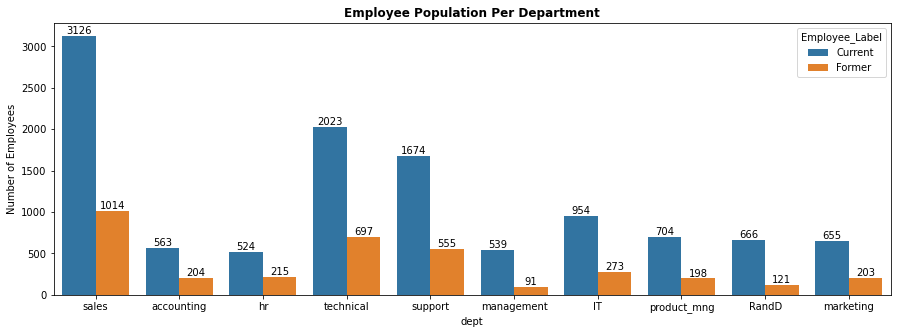

In [38]:
fig2= plt.figure(figsize=(15,5))
ax1 = sns.countplot(x = 'dept', hue='Employee_Label', data = fullEmployeeData)
plt.title('Employee Population Per Department',fontweight ="bold")
plt.ylabel('Number of Employees')

for i in ax1.containers:
    ax1.bar_label(i,)

This shows the top three most populated departments to be Sales, Technical, and Support departments.

In [39]:
# Number of projects per employee

fullEmployeeData.groupby(['Employee_Label'])['number_project'].value_counts()

Employee_Label  number_project
Current         3.0               3983
                4.0               3956
                5.0               2149
                2.0                821
                6.0                519
Former          2.0               1567
                6.0                655
                5.0                612
                4.0                409
                7.0                256
                3.0                 72
Name: number_project, dtype: int64

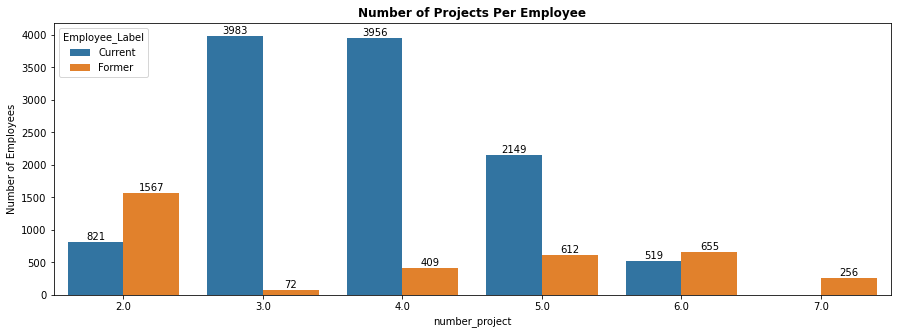

In [40]:
fig3 = plt.figure(figsize=(15,5))
ax2 = sns.countplot(x = 'number_project', hue='Employee_Label', data = fullEmployeeData, )
plt.title('Number of Projects Per Employee',fontweight ="bold")
plt.ylabel('Number of Employees')

for i in ax2.containers:
    ax2.bar_label(i,)

In [41]:
# Benchmark for Overworked staff
fullEmployeeData.groupby(['Employee_Label'])['number_project'].mean()

Employee_Label
Current    3.786664
Former     3.855503
Name: number_project, dtype: float64

In [42]:
# Benchmark for Overworked staff
fullEmployeeData['number_project'].mean()

3.80305353690246

Using benchmark for overworked staff, based on number of projects, as 3 projects:

In [43]:
# Percent Overworked
percentOverwokedCurrent = ((3956+2149+519)/11428)*100
print('Current = ' + str(percentOverwokedCurrent) + '%')

percentOverwokedFormer = ((655+612+409+256)/3571)*100
print('Former = ' + str(percentOverwokedFormer) + '%')

Current = 57.96289814490725%
Former = 54.10249229907589%


In [44]:
allOverworkedStaff = fullEmployeeData[fullEmployeeData['number_project'] > 3]['number_project'].count()

totalStaffPopulation = fullEmployeeData['Emp ID'].count()

percentOverwoked = (allOverworkedStaff / totalStaffPopulation) * 100

print('Percentage of all overworked staff = ' + str(percentOverwoked.round(3)) + '%')

Percentage of all overworked staff = 57.044%


In [45]:
overworkedCurrent = existingEmployees[existingEmployees['number_project'] > 3].count()['number_project']

currentPopulation = fullEmployeeData.groupby(['Employee_Label'])['number_project'].value_counts()['Current'].sum()

percentOverwokedCurrent = (overworkedCurrent / currentPopulation) * 100

print('Percentage of current overworked staff = ' + str(percentOverwokedCurrent.round(3)) + '%')

Percentage of current overworked staff = 57.963%


In [46]:
overworkedFormer = exitedEmployees[exitedEmployees['number_project'] > 3].count()['number_project']

formerPopulation = fullEmployeeData.groupby(['Employee_Label'])['number_project'].value_counts()['Former'].sum()

percentOverworkedFormer = (overworkedFormer / formerPopulation) * 100

print('Percentage of former overworked staff = ' + str(percentOverworkedFormer.round(3)) + '%')

Percentage of former overworked staff = 54.102%


In [47]:
fullEmployeeData.groupby(['Employee_Label'])['time_spend_company'].unique()

Employee_Label
Current    [3.0, 2.0, 4.0, 6.0, 5.0, 8.0, 10.0, 7.0]
Former                     [3.0, 6.0, 4.0, 5.0, 2.0]
Name: time_spend_company, dtype: object

<AxesSubplot:xlabel='time_spend_company', ylabel='number_project'>

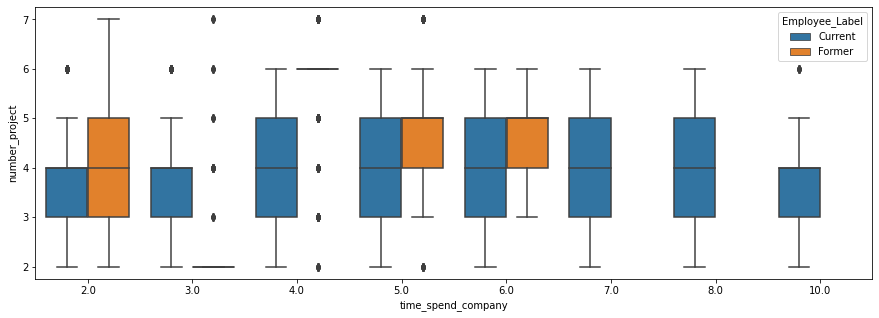

In [48]:
# Number of Projects per Employee with respect to the Time Spent in Company

fig4= plt.figure(figsize=(15,5))
sns.boxplot(y = 'number_project',
            x = 'time_spend_company',
            hue='Employee_Label',
            data = fullEmployeeData)

This shows that a large proportion of the former employees handled more than 3 projects especially at the 2nd year. 

<AxesSubplot:xlabel='promotion_last_5years', ylabel='number_project'>

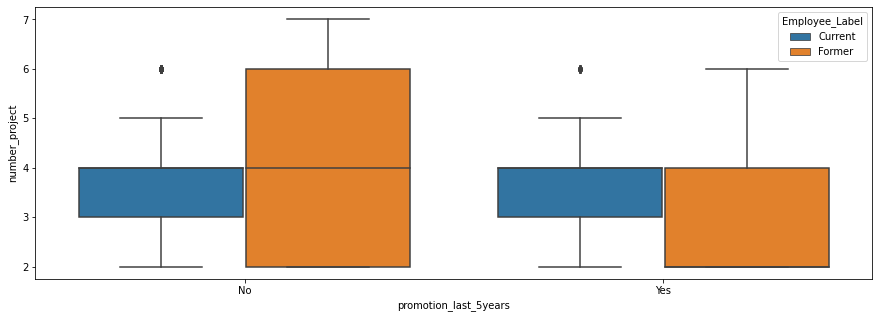

In [49]:
# Number of Projects Handled VS Promotion Status

fig5 = plt.figure(figsize=(15,5))
sns.boxplot(y = 'number_project',
            x = 'promotion_last_5years',
            hue='Employee_Label',
            data = fullEmployeeData)

This shows that while a large proportion of the former employees handled a lot of projects, most were not promoted.

In [50]:
# Analysing Satisfaction Level for all employees

fullEmployeeData.groupby(['Employee_Label'])['satisfaction_level'].value_counts()

Employee_Label  satisfaction_level
Current         0.50                  226
                0.66                  217
                0.59                  212
                0.69                  209
                0.49                  207
                                     ... 
Former          0.26                    1
                0.29                    1
                0.65                    1
                0.67                    1
                0.68                    1
Name: satisfaction_level, Length: 170, dtype: int64

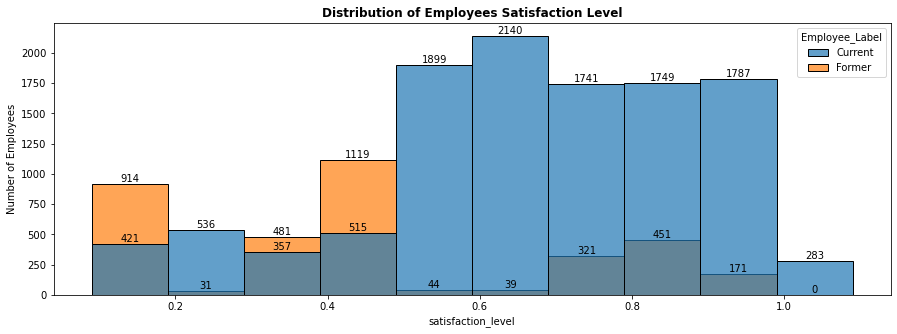

In [51]:
fig6= plt.figure(figsize=(15,5))
ax3 = sns.histplot(x='satisfaction_level',
                  data= fullEmployeeData,
                  hue='Employee_Label', alpha = 0.7,
                  bins=15, binwidth=0.1, kde=False)
plt.title("Distribution of Employees Satisfaction Level", fontweight='bold')
plt.ylabel('Number of Employees')

for i in ax3.containers:
    ax3.bar_label(i,)

Text(0, 0.5, 'Number of Employees')

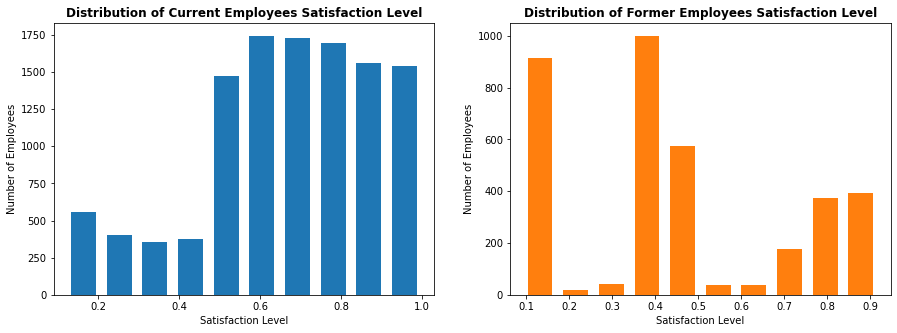

In [52]:
fig7= plt.figure(figsize=(15,5))
plt.subplot(1,2,1)

plt.hist((existingEmployees['satisfaction_level']), bins=10, alpha=1, color='#1f77b4', rwidth=0.7)
plt.title("Distribution of Current Employees Satisfaction Level", fontweight='bold')
plt.xlabel('Satisfaction Level')
plt.ylabel('Number of Employees')


plt.subplot(1,2,2)
plt.hist((exitedEmployees['satisfaction_level']), bins=10, alpha=1, color='#ff7f0e', rwidth=0.7)
plt.title("Distribution of Former Employees Satisfaction Level", fontweight='bold')
plt.xlabel('Satisfaction Level')
plt.ylabel('Number of Employees')


This shows that a larger proportion of former employees have satisfaction levels less than 50%.

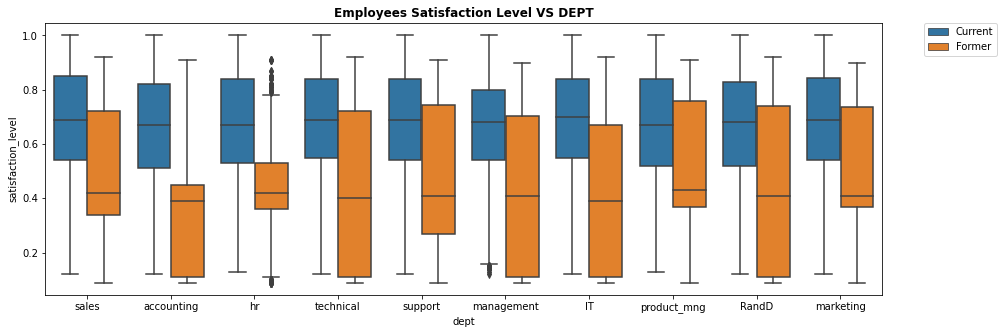

In [53]:
# Employees Satisfaction Level VS DEPT
fig8 = plt.figure(figsize=(15,5))
ax4 =sns.boxplot(y = 'satisfaction_level',
            x = 'dept',
            hue='Employee_Label',
            data = fullEmployeeData)
plt.title("Employees Satisfaction Level VS DEPT", fontweight='bold')
ax4.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

The current employees have better satisfaction levels than the former employees that left the company.

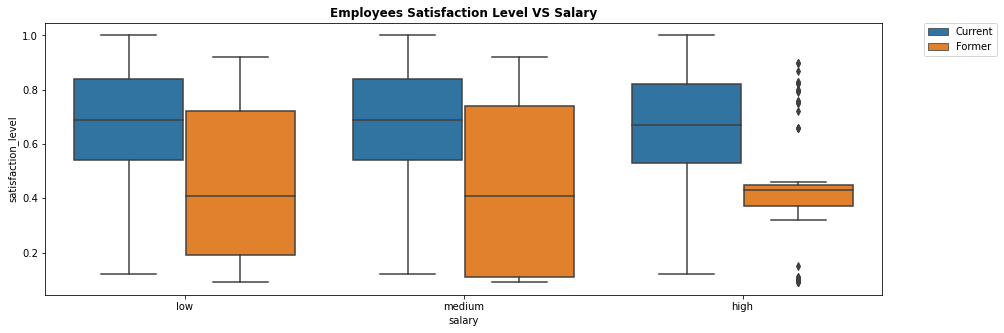

In [54]:
fig9 = plt.figure(figsize=(15,5))
ax5=sns.boxplot(y = 'satisfaction_level',
            x = 'salary',
            hue='Employee_Label',
            data = fullEmployeeData)
plt.title("Employees Satisfaction Level VS Salary", fontweight='bold')
ax5.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

**Most of the former employees were from the low and medium salary categories.**

Text(0, 0.5, 'Number of Employees')

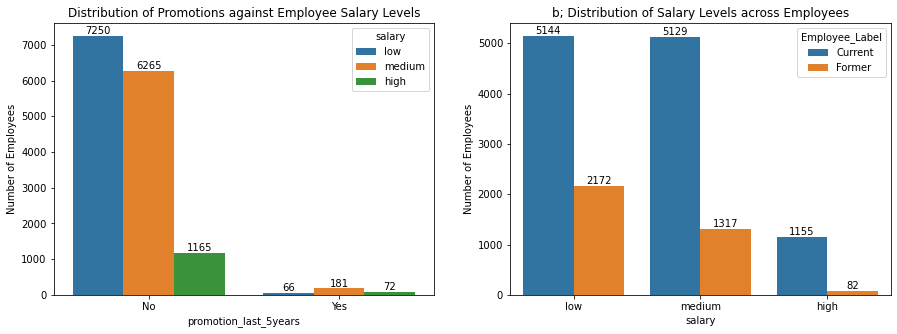

In [55]:
fig10= plt.figure(figsize=(15,5))
plt.subplot(1,2,1)

ax6 = sns.countplot(x='promotion_last_5years',data= fullEmployeeData, hue='salary')
for i in ax6.containers:
    ax6.bar_label(i,)
plt.title('Distribution of Promotions against Employee Salary Levels')
plt.ylabel('Number of Employees')

plt.subplot(1,2,2)

ax7=sns.countplot(x='salary',data=fullEmployeeData,hue='Employee_Label')
for i in ax7.containers:
    ax7.bar_label(i,)
plt.title('b; Distribution of Salary Levels across Employees')
plt.ylabel('Number of Employees')


Text(0.5, 1.0, 'Average Monthly Hours showing Promotion Status')

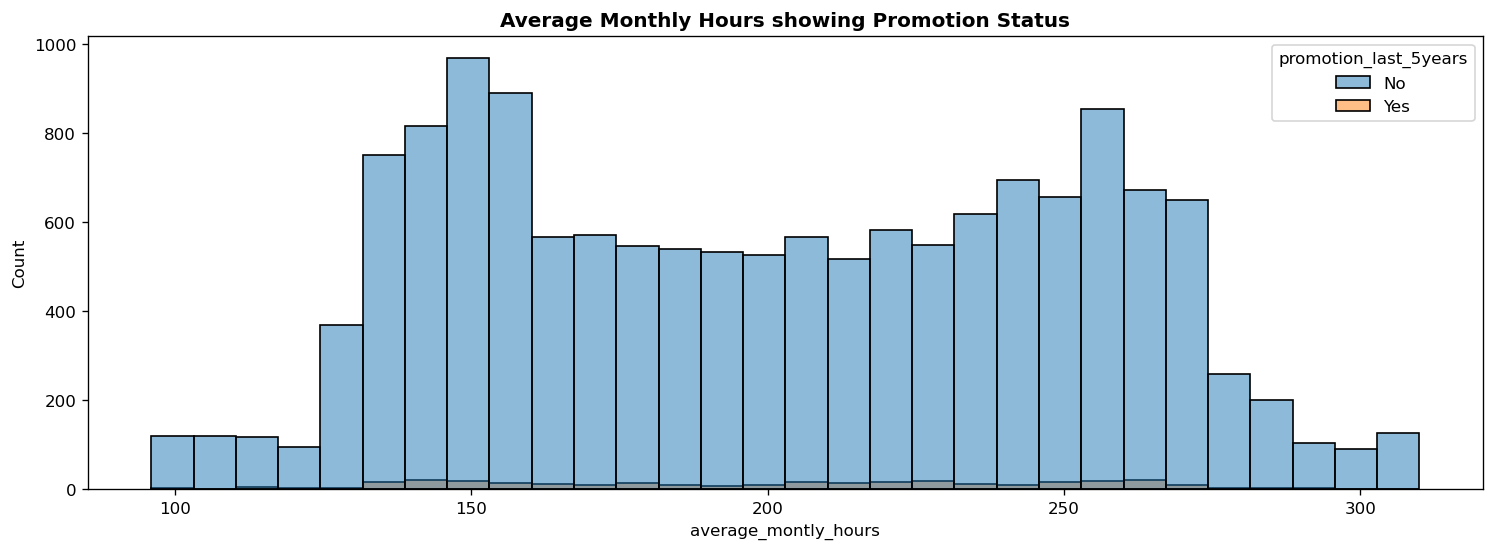

In [56]:
fig11= plt.figure(figsize=(15,5), dpi=120)
sns.histplot(x='average_montly_hours',
        data= fullEmployeeData, hue='promotion_last_5years',
        kde=False)
plt.title('Average Monthly Hours showing Promotion Status', fontweight='bold')

These show discrepancy in the promotion and renumeration standards and policies within the company

In [57]:
# ANALYSING 'AVERAGE MONTHLY HOURS' OF EMPLOYEES

fullEmployeeData.groupby(['Employee_Label'])['average_montly_hours'].value_counts()

Employee_Label  average_montly_hours
Current         224.0                   102
                173.0                    96
                149.0                    94
                162.0                    94
                167.0                    94
                                       ... 
Former          178.0                     1
                188.0                     1
                196.0                     1
                203.0                     1
                204.0                     1
Name: average_montly_hours, Length: 356, dtype: int64

In [58]:
fullEmployeeData.groupby(['Employee_Label'])['ave_monthly_hours_bands'].value_counts()

Employee_Label  ave_monthly_hours_bands
Current         150 - 199                  3924
                200 - 249                  3583
                250 - 299                  2035
                100 - 149                  1832
                50 - 99                      54
Former          250 - 299                  1097
                100 - 149                  1059
                200 - 249                   648
                150 - 199                   597
                300 - 349                   170
Name: ave_monthly_hours_bands, dtype: int64

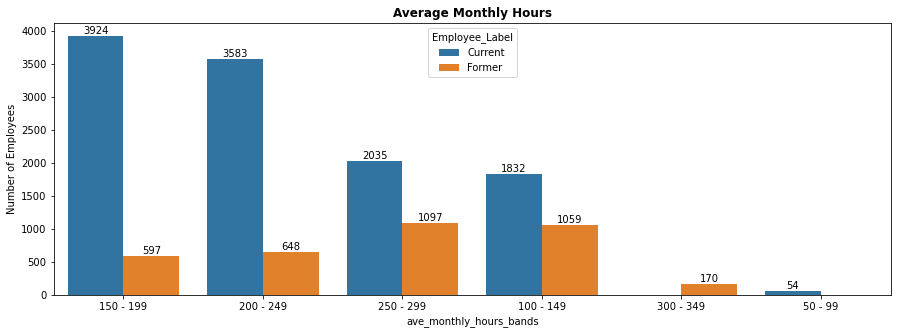

In [59]:
fig12 = plt.figure(figsize=(15,5))
ax8=sns.countplot(x = 'ave_monthly_hours_bands',
              hue='Employee_Label',
              data = fullEmployeeData,
              order = fullEmployeeData['ave_monthly_hours_bands'].value_counts(ascending = False).index)
plt.title('Average Monthly Hours', fontweight='bold')
plt.ylabel('Number of Employees')


for i in ax8.containers:
    ax8.bar_label(i,)

Text(0.5, 1.0, 'Average Monthly Hours')

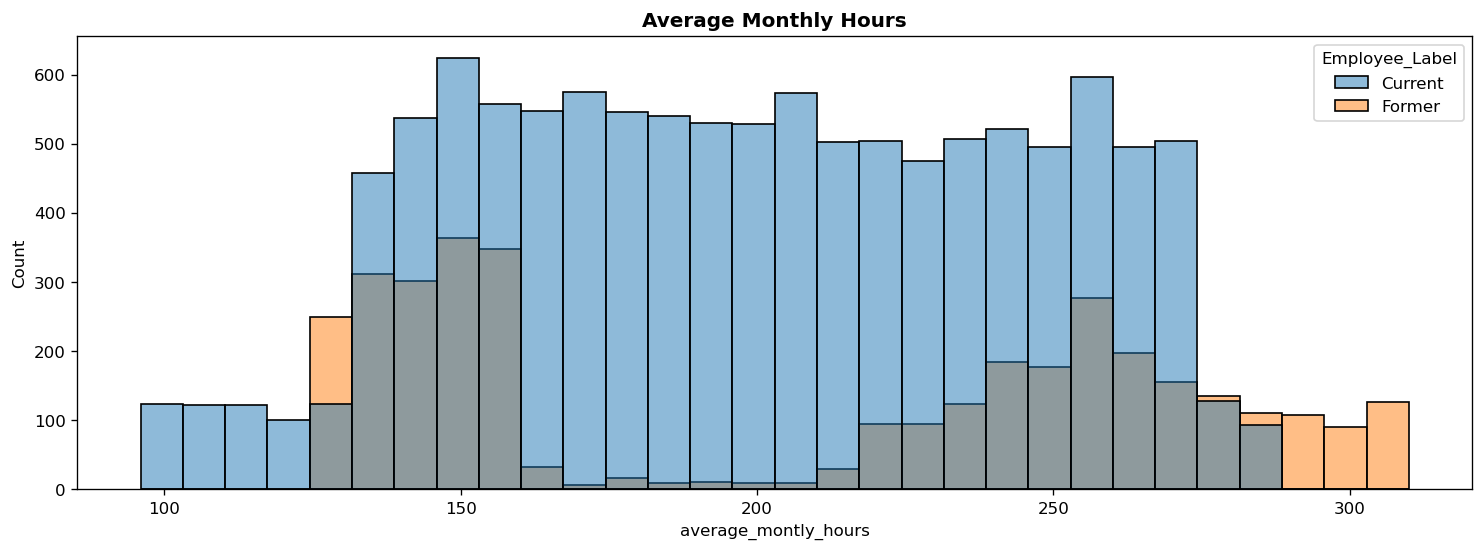

In [60]:
fig13= plt.figure(figsize=(15,5), dpi=120)
sns.histplot(x='average_montly_hours',
        data= fullEmployeeData, hue='Employee_Label',
        kde=False)
plt.title('Average Monthly Hours', fontweight='bold')

**About 50% of all employees put in greater than or equal to 200 hours of work each month.**

In [61]:
# ANALYSING TIME EMPLOYEES SPENT IN COMPANY 

fullEmployeeData.groupby(['Employee_Label'])['time_spend_company'].value_counts()

Employee_Label  time_spend_company
Current         3.0                   4857
                2.0                   3191
                4.0                   1667
                5.0                    640
                6.0                    509
                10.0                   214
                7.0                    188
                8.0                    162
Former          3.0                   1586
                4.0                    890
                5.0                    833
                6.0                    209
                2.0                     53
Name: time_spend_company, dtype: int64

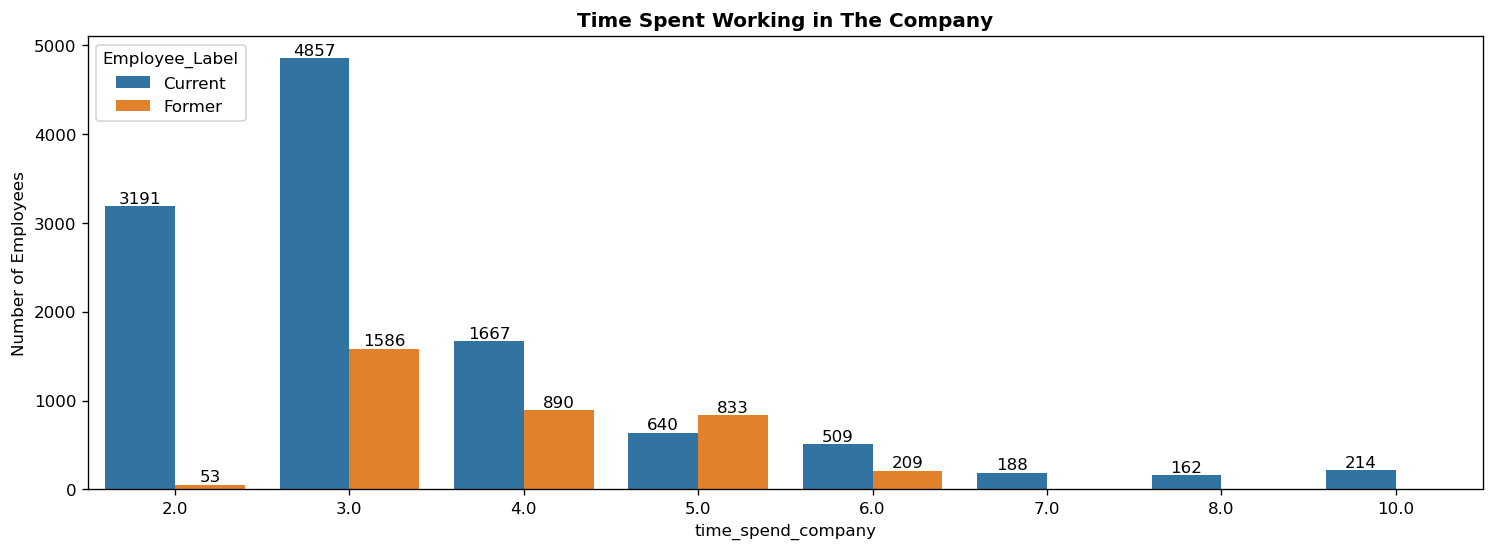

In [62]:
fig14= plt.figure(figsize=(15,5), dpi=120)
ax9=sns.countplot(x = 'time_spend_company',
              hue='Employee_Label',
              data = fullEmployeeData,
              #order = fullEmployeeData['time_spend_company'].value_counts(ascending = False).index
)
plt.title('Time Spent Working in The Company', fontweight='bold')
plt.ylabel('Number of Employees')
ax7.legend(loc=1) #upper right corner 
for i in ax9.containers:
    ax9.bar_label(i,)

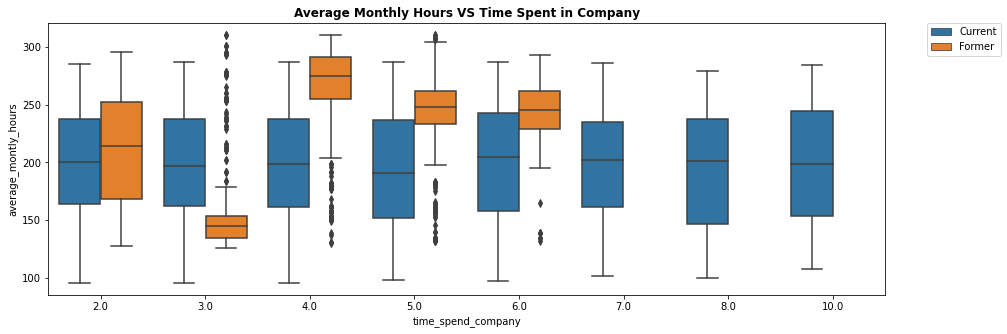

In [63]:
fig15= plt.figure(figsize=(15,5))
ax10=sns.boxplot(x = 'time_spend_company',
            y = 'average_montly_hours',
            hue='Employee_Label',
            data = fullEmployeeData)
plt.title("Average Monthly Hours VS Time Spent in Company", fontweight='bold')
ax10.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

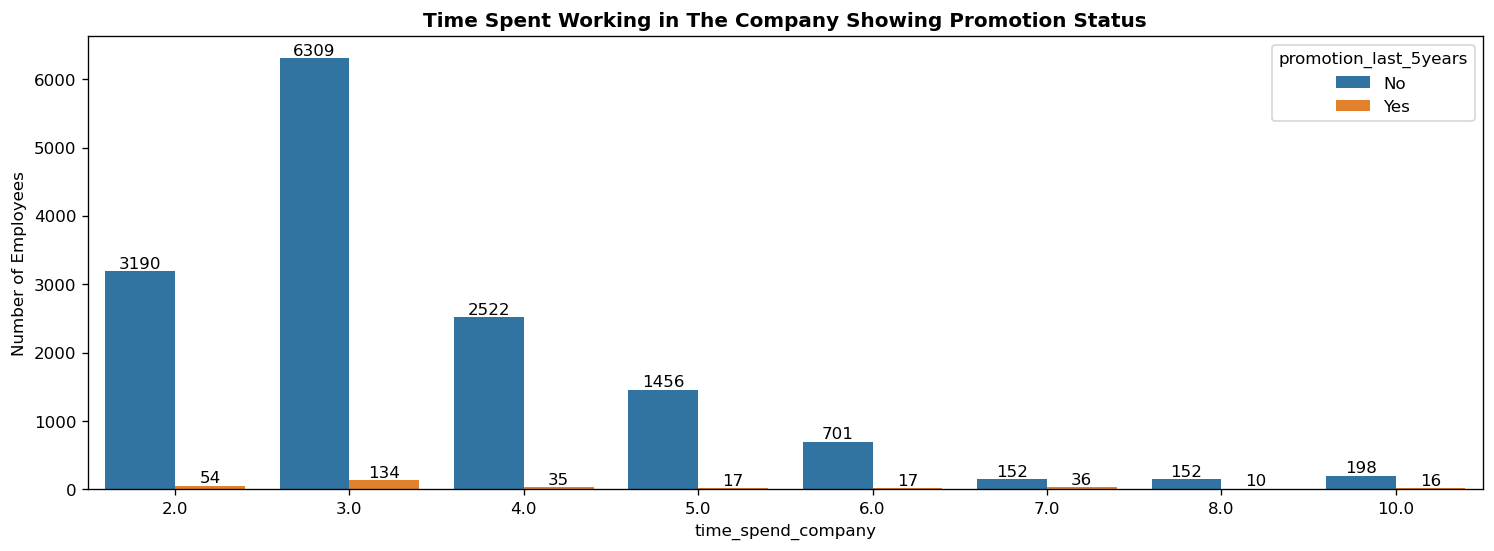

In [64]:
fig16= plt.figure(figsize=(15,5), dpi=120)
ax11 = sns.countplot(x='time_spend_company',
                    data= fullEmployeeData,
                    hue='promotion_last_5years')
plt.title('Time Spent Working in The Company Showing Promotion Status', fontweight='bold')
plt.ylabel('Number of Employees')
for i in ax11.containers:
    ax11.bar_label(i,)

Text(0, 0.5, 'Number of Employees')

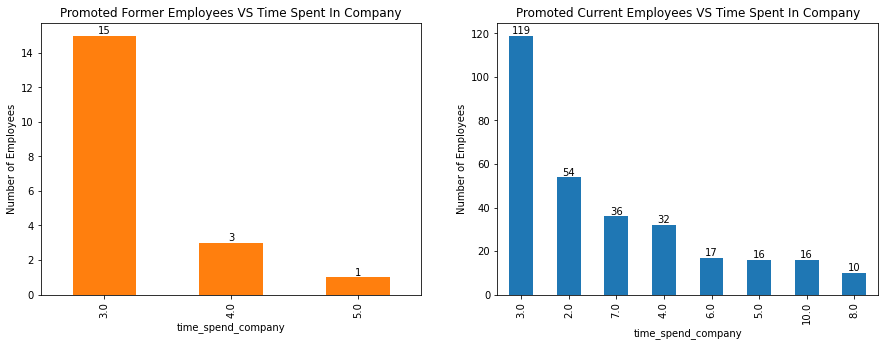

In [65]:
fig17= plt.figure(figsize=(15,5))
plt.subplot(1,2,1)

ax12 = ((exitedEmployees.groupby(['promotion_last_5years'])['time_spend_company'].value_counts())[1]).plot.bar(color='#ff7f0e')
for i in ax12.containers:
    ax12.bar_label(i,)
plt.ylabel('Number of Employees')
plt.title('Promoted Former Employees VS Time Spent In Company')

plt.subplot(1,2,2)

ax13 = ((existingEmployees.groupby(['promotion_last_5years'])['time_spend_company'].value_counts())[1]).plot.bar()
for i in ax13.containers:
    ax13.bar_label(i,)
plt.title('Promoted Current Employees VS Time Spent In Company')
plt.ylabel('Number of Employees')


**The 'Time Spent in Company' Plots show the pernicious attrition rate in the company. Despite appreciable and commendable work input from the employees, the company failed to provide commensurate reward and compensation (in terms of renumeration and promotions) for their employees.
None of the former employees stayed with the company beyond 6 years.**

In [66]:
# Percentage of Former Employees that were promoted
former_employees_promoted = (((exitedEmployees['promotion_last_5years'] == 1).sum()) / (exitedEmployees['Emp ID'].count())) * 100
print("The proportion of Former Employees that were promoted is " + str(former_employees_promoted.round(3)) + '%')

The proportion of Former Employees that were promoted is 0.532%


In [67]:
# Percentage of Current Employees that have been promoted
current_employees_promoted = (((existingEmployees['promotion_last_5years'] == 1).sum()) / (existingEmployees['Emp ID'].count())) * 100
print("The proportion of Current Employees that have been promoted is " + str(current_employees_promoted.round(3)) + '%')

The proportion of Current Employees that have been promoted is 2.625%


In [68]:
# Percentage of All Employees that were promoted
all_promoted_employees = (
    ((fullEmployeeData['promotion_last_5years'] == 'Yes').sum())
 /
    (fullEmployeeData['Emp ID'].count())
)*100
print("The proportion of All Promoted Employees is " + str(all_promoted_employees.round(3)) + '%')

The proportion of All Promoted Employees is 2.127%


In [69]:
attrition_rate = (len(fullEmployeeData[fullEmployeeData['Employee_Label']=='Former']) / len(fullEmployeeData['Emp ID'])) * 100
attrition_rate
print("The Company's attrition rate is " + str(np.float64(attrition_rate).round(3)) + '%')

The Company's attrition rate is 23.808%


In [70]:
corr=fullEmployeeData.corr()
corr

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000


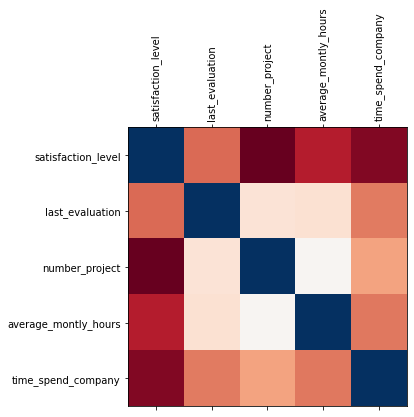

In [71]:
fig18 = plt.figure(figsize=(15,5))
plt.matshow(corr, cmap='RdBu', fignum=fig18.number)
plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical');
plt.yticks(range(len(corr.columns)), corr.columns);

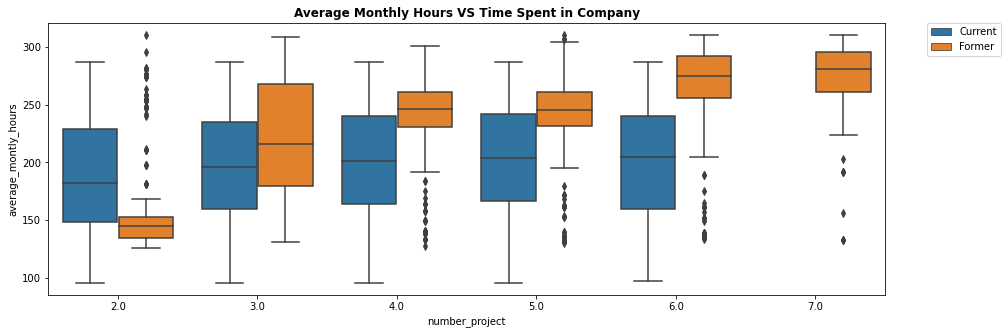

In [72]:
fig19= plt.figure(figsize=(15,5))
ax14=sns.boxplot(x = 'number_project',
            y = 'average_montly_hours',
            hue='Employee_Label',
            data = fullEmployeeData)
plt.title("Average Monthly Hours VS Time Spent in Company", fontweight='bold')
ax14.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

**The  'Average Monthly Hours' variable is associated with and influenced by the 'Number of Projects' variable.**

In [73]:
"""# The plots as image files
fig1.savefig('fig1.png')
fig2.savefig('fig2.png')
fig3.savefig('fig3.png')
fig4.savefig('fig4.png')
fig5.savefig('fig5.png')
fig6.savefig('fig6.png')
fig7.savefig('fig7.png')
fig8.savefig('fig8.png')
fig9.savefig('fig9.png')
fig10.savefig('fig10.png')
fig11.savefig('fig11.png')
fig12.savefig('fig12.png')
fig13.savefig('fig13.png')
fig14.savefig('fig14.png')
fig15.savefig('fig15.png')
fig16.savefig('fig16.png')
fig17.savefig('fig17.png')
fig18.savefig('fig18.png')
fig19.savefig('fig19.png')"""

"# The plots as image files\nfig1.savefig('fig1.png')\nfig2.savefig('fig2.png')\nfig3.savefig('fig3.png')\nfig4.savefig('fig4.png')\nfig5.savefig('fig5.png')\nfig6.savefig('fig6.png')\nfig7.savefig('fig7.png')\nfig8.savefig('fig8.png')\nfig9.savefig('fig9.png')\nfig10.savefig('fig10.png')\nfig11.savefig('fig11.png')\nfig12.savefig('fig12.png')\nfig13.savefig('fig13.png')\nfig14.savefig('fig14.png')\nfig15.savefig('fig15.png')\nfig16.savefig('fig16.png')\nfig17.savefig('fig17.png')\nfig18.savefig('fig18.png')\nfig19.savefig('fig19.png')"

## Preprocessing For Data Modelling

In [74]:
mDF['dept'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'RandD', 'marketing'], dtype=object)

In [75]:
mDF['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

In [76]:
mDF['Employee_Label'].unique()

array(['Current', 'Former'], dtype=object)

In [77]:
# Handling categorical data (creating dummy variables)
mDF = pd.get_dummies(mDF, columns=['dept'])

In [78]:
# Handling categorical data (label encoding)
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
columns_to_encode = ['salary', 'Employee_Label']
mDF[columns_to_encode] = mDF[columns_to_encode].apply(encoder.fit_transform)


In [79]:
mDF = mDF[['Employee_Label', 'satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'salary', 'dept_IT',
       'dept_RandD', 'dept_accounting', 'dept_hr', 'dept_management',
       'dept_marketing', 'dept_product_mng', 'dept_sales', 'dept_support',
       'dept_technical', 'Emp ID']]

In [80]:
mDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Employee_Label         14999 non-null  int32  
 1   satisfaction_level     14999 non-null  float64
 2   last_evaluation        14999 non-null  float64
 3   number_project         14999 non-null  float64
 4   average_montly_hours   14999 non-null  float64
 5   time_spend_company     14999 non-null  float64
 6   Work_accident          14999 non-null  float64
 7   promotion_last_5years  14999 non-null  float64
 8   salary                 14999 non-null  int32  
 9   dept_IT                14999 non-null  uint8  
 10  dept_RandD             14999 non-null  uint8  
 11  dept_accounting        14999 non-null  uint8  
 12  dept_hr                14999 non-null  uint8  
 13  dept_management        14999 non-null  uint8  
 14  dept_marketing         14999 non-null  uint8  
 15  de

In [81]:
mDF

,Employee_Label,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,dept_IT,dept_RandD,dept_accounting,dept_hr,dept_management,dept_marketing,dept_product_mng,dept_sales,dept_support,dept_technical,Emp ID
0,0,0.58,0.74,4.0,215.0,3.0,0.0,0.0,1,0,0,0,0,0,0,0,1,0,0,2001.0
1,0,0.82,0.67,2.0,202.0,3.0,0.0,0.0,1,0,0,0,0,0,0,0,1,0,0,2002.0
2,0,0.45,0.69,5.0,193.0,3.0,0.0,0.0,1,0,0,0,0,0,0,0,1,0,0,2003.0
3,0,0.78,0.82,5.0,247.0,3.0,0.0,0.0,1,0,0,0,0,0,0,0,1,0,0,2004.0
4,0,0.49,0.60,3.0,214.0,2.0,0.0,0.0,1,0,0,0,0,0,0,0,1,0,0,2005.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,1,0.40,0.57,2.0,151.0,3.0,0.0,0.0,1,0,0,0,0,0,0,0,0,1,0,14995.0
14995,1,0.37,0.48,2.0,160.0,3.0,0.0,0.0,1,0,0,0,0,0,0,0,0,1,0,14996.0
14996,1,0.37,0.53,2.0,143.0,3.0,0.0,0.0,1,0,0,0,0,0,0,0,0,1,0,14997.0
14997,1,0.11,0.96,6.0,280.0,4.0,0.0,0.0,1,0,0,0,0,0,0,0,0,1,0,14998.0


##### Feature Selection

In [82]:
mDF.columns[1:]

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'salary', 'dept_IT', 'dept_RandD',
       'dept_accounting', 'dept_hr', 'dept_management', 'dept_marketing',
       'dept_product_mng', 'dept_sales', 'dept_support', 'dept_technical',
       'Emp ID'],
      dtype='object')

In [83]:
# Using Logistic Regression

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression


X = mDF.values[:,1:]
Y = mDF.values[:,0]

# feature extraction
model = LogisticRegression(solver='lbfgs')
rfe = RFE(model,n_features_to_select=4)
fit = rfe.fit(X, Y)

inputFeatures = mDF.columns[1:]
selectedFeatures = []
discarded = []

for feat, select, rank in zip(inputFeatures,fit.support_, fit.ranking_):
    if select == True:
        selectedFeatures.append(feat)
    else:
        discarded.append(feat)
    print(feat, select, rank)
print("Selected Features: %s" % selectedFeatures)



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

satisfaction_level True 1
last_evaluation False 3
number_project False 5
average_montly_hours False 14
time_spend_company False 4
Work_accident True 1
promotion_last_5years True 1
salary False 12
dept_IT False 13
dept_RandD False 2
dept_accounting False 10
dept_hr False 6
dept_management True 1
dept_marketing False 11
dept_product_mng False 15
dept_sales False 9
dept_support False 7
dept_technical False 8
Emp ID False 16
Selected Features: ['satisfaction_level', 'Work_accident', 'promotion_last_5years', 'dept_management']


##### Testing the model

In [84]:
# On Selected Input features

X = mDF[selectedFeatures].values
res = model.fit(X,Y)
score = res.score(X,Y)
score

0.7725181678778585

In [85]:
test_DF = mDF[mDF['Employee_Label']==0]
test_DF

,Employee_Label,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,dept_IT,dept_RandD,dept_accounting,dept_hr,dept_management,dept_marketing,dept_product_mng,dept_sales,dept_support,dept_technical,Emp ID
0,0,0.58,0.74,4.0,215.0,3.0,0.0,0.0,1,0,0,0,0,0,0,0,1,0,0,2001.0
1,0,0.82,0.67,2.0,202.0,3.0,0.0,0.0,1,0,0,0,0,0,0,0,1,0,0,2002.0
2,0,0.45,0.69,5.0,193.0,3.0,0.0,0.0,1,0,0,0,0,0,0,0,1,0,0,2003.0
3,0,0.78,0.82,5.0,247.0,3.0,0.0,0.0,1,0,0,0,0,0,0,0,1,0,0,2004.0
4,0,0.49,0.60,3.0,214.0,2.0,0.0,0.0,1,0,0,0,0,0,0,0,1,0,0,2005.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11423,0,0.90,0.55,3.0,259.0,10.0,1.0,1.0,0,0,0,0,0,1,0,0,0,0,0,14207.0
11424,0,0.74,0.95,5.0,266.0,10.0,0.0,1.0,0,0,0,0,0,1,0,0,0,0,0,14208.0
11425,0,0.85,0.54,3.0,185.0,10.0,0.0,1.0,0,0,0,0,0,1,0,0,0,0,0,14209.0
11426,0,0.33,0.65,3.0,172.0,10.0,0.0,1.0,0,0,0,0,0,0,1,0,0,0,0,14210.0


In [86]:
features = test_DF[selectedFeatures]
features

,satisfaction_level,Work_accident,promotion_last_5years,dept_management
0,0.58,0.0,0.0,0
1,0.82,0.0,0.0,0
2,0.45,0.0,0.0,0
3,0.78,0.0,0.0,0
4,0.49,0.0,0.0,0
...,...,...,...,...
11423,0.90,1.0,1.0,1
11424,0.74,0.0,1.0,1
11425,0.85,0.0,1.0,1
11426,0.33,0.0,1.0,0


In [87]:
# Make predictions using the loaded model
predictions = model.predict(features)


In [88]:
test_DF['Outcome'] = predictions

C:\Users\hp\AppData\Local\Temp/ipykernel_12856/464557005.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_DF['Outcome'] = predictions


In [89]:
test_DF['Outcome'].value_counts()

0.0    10691
1.0      737
Name: Outcome, dtype: int64

In [90]:
test_DF['Outcome_cat'] = test_DF['Outcome'].apply(lambda x: "Will_Remain" if x==0 else "Can_Exit")

C:\Users\hp\AppData\Local\Temp/ipykernel_12856/286218820.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_DF['Outcome_cat'] = test_DF['Outcome'].apply(lambda x: "Will_Remain" if x==0 else "Can_Exit")


In [91]:
test_DF['Outcome_cat'].value_counts()

Will_Remain    10691
Can_Exit         737
Name: Outcome_cat, dtype: int64

In [92]:
poss = test_DF[test_DF['Outcome_cat']== 'Can_Exit']

In [93]:
np.sort(poss['satisfaction_level'].unique())

array([0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29])

In [94]:
poss['Work_accident'].unique()

array([0.])

In [95]:
poss['promotion_last_5years'].unique()

array([0.])

In [96]:
display((poss['dept_IT'].sum()), (poss['dept_RandD'].sum()),(poss['dept_accounting'].sum()),\
        (poss['dept_hr'].sum()),(poss['dept_management'].sum()),(poss['dept_marketing'].sum()),\
        (poss['dept_product_mng'].sum()),(poss['dept_sales'].sum()),(poss['dept_support'].sum()),(poss['dept_technical'].sum()))

56

47

42

36

6

41

48

229

101

131

#### Comments
The model predicts that amongst the current empolyees, the ones prone to leave next are those with satisfaction levels less than 30%, those that have had no promotion in the last 5 years, and/or those with no work accidents documented.

## Findings and Recommendations


The data analysis carried out has proven that the employees who are leaving the company are those with poor satisfaction levels (of approximately 44% and less). This poor satisfaction level can be attributed to the following:

<br>

- **High workload**. The data showed that a large proportion of the former employees handled more than 3 projects especially at the 2nd year. About 50% of all employees put in greater than or equal to 200 hours of work each month.

<br>

- **Poor Promotion culture**. The data showed that while a large proportion of the former employees were forthcoming with their work (as exhibited by the number of projects handled, and the high average monthly hours per employee), most were not promoted. Even after their performance evaluation was carried out.

<br>

- **Poor renumeration standards**. Most of the former employees were from the low and medium salary categories. In this Company, only 2.127% of all employees were ever promoted. Among the former employees, only 0.532% were promoted even after an appreciable time spent working with the Company.

<br>

The model predicts that amongst the current empolyees, the ones prone to leave next are those with satisfaction levels less than 30%, those that have had no promotion in the last 5 years, and/or those with no work accidents documented.

The satisfaction level of each employee has been proven to indicate the employees that are prone to leave. Seeing that the current employees have better satisfaction levels than the former employees that left the company. It is important for the company to work on ensuring an improved satisfaction level amongst its employees.

The Company's culture and policies on promotion, renumeration and general employee benefits and wellbeing need to be completely overhauled and the right strategies employed to ensure a good reduction of the employee attrition rate (currently at 23.808%) in this Company. Also avenues for career growth for each employee should be created within the Company to curb its high employee attrition rate and encourage employee retention.
